In [3]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import numpy as np
from datetime import datetime

In [5]:
may_trips = pd.read_csv('../data/may_trip.csv')

In [6]:
may_trips.startTime = pd.to_datetime(may_trips.startTime)
may_trips.startDate = pd.to_datetime(may_trips.startDate)
may_trips.endTime = pd.to_datetime(may_trips.endTime)
may_trips.endDate = pd.to_datetime(may_trips.endDate)
may_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224969 entries, 0 to 224968
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   pubTimeStamp    224969 non-null  object        
 1   companyName     224969 non-null  object        
 2   tripRecordNum   224969 non-null  object        
 3   sumdID          224969 non-null  object        
 4   tripDuration    224969 non-null  float64       
 5   tripDistance    224969 non-null  float64       
 6   startDate       224969 non-null  datetime64[ns]
 7   startTime       224969 non-null  datetime64[ns]
 8   endDate         224969 non-null  datetime64[ns]
 9   endTime         224969 non-null  datetime64[ns]
 10  startLatitude   224969 non-null  float64       
 11  startLongitude  224969 non-null  float64       
 12  endLatitude     224969 non-null  float64       
 13  endLongitude    224969 non-null  float64       
 14  tripRoute       224969 non-null  obj

In [7]:
may_trips['startTime_clean'] = pd.DatetimeIndex(may_trips['startTime']).time
may_trips['endTime_clean'] = pd.DatetimeIndex(may_trips['endTime']).time
may_trips.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,startTime_clean,endTime_clean
0,2019-05-01 00:00:55.423000,Bird,BRD2134,Powered9EAJL,3.0000,958.00528,2019-05-01,2021-10-26 00:00:20.460000,2019-05-01,2021-10-26 00:02:52.346666,36.15710,-86.80360,36.15660,-86.80670,"[[36.157235,-86.803612],[36.157235,-86.80362],...",2019-05-02 05:30:23.780000,00:00:20.460000,00:02:52.346666
1,2019-05-01 00:03:33.147000,Lyft,LFT5,Powered296631,1.7156,1371.39112,2019-05-01,2021-10-26 00:01:50.090000,2019-05-01,2021-10-26 00:03:33.026666,36.15797,-86.77896,36.16054,-86.77689,"[[36.15797,-86.77896],[36.15795,-86.77873],[36...",2019-05-02 07:20:32.757000,00:01:50.090000,00:03:33.026666
2,2019-05-01 00:05:55.570000,Bird,BRD2168,Powered7S2UU,3.0000,2296.58800,2019-05-01,2021-10-26 00:03:47.363333,2019-05-01,2021-10-26 00:07:13.596666,36.15470,-86.78180,36.15650,-86.78680,"[[36.155068,-86.782124],[36.156597,-86.78675]]",2019-05-02 05:30:24.530000,00:03:47.363333,00:07:13.596666
3,2019-05-01 00:05:55.570000,Bird,BRD2166,PoweredZIIVX,3.0000,1200.78744,2019-05-01,2021-10-26 00:04:21.386666,2019-05-01,2021-10-26 00:06:59.176666,36.14940,-86.77950,36.15310,-86.77960,"[[36.149741,-86.779344],[36.149741,-86.779327]...",2019-05-02 05:30:24.237000,00:04:21.386666,00:06:59.176666
4,2019-05-01 00:05:55.570000,Bird,BRD2165,PoweredJ7MB3,2.0000,351.04988,2019-05-01,2021-10-26 00:04:27.796666,2019-05-01,2021-10-26 00:06:23.150000,36.17780,-86.78660,36.17740,-86.78760,"[[36.177699,-86.786477],[36.177711,-86.786469]...",2019-05-02 05:30:24.207000,00:04:27.796666,00:06:23.150000


In [8]:
may_trips['startDate'] = may_trips['startDate'].astype('str')
may_trips['startTime_clean'] = may_trips['startTime_clean'].astype('str')
may_trips['startDateTime_clean'] = may_trips['startDate'] + ' ' + may_trips['startTime_clean']
may_trips['endDate'] = may_trips['endDate'].astype('str')
may_trips['endTime_clean'] = may_trips['endTime_clean'].astype('str')
may_trips['endDateTime_clean'] = may_trips['endDate'] + ' ' + may_trips['endTime_clean']
may_trips.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,startTime_clean,endTime_clean,startDateTime_clean,endDateTime_clean
0,2019-05-01 00:00:55.423000,Bird,BRD2134,Powered9EAJL,3.0000,958.00528,2019-05-01,2021-10-26 00:00:20.460000,2019-05-01,2021-10-26 00:02:52.346666,36.15710,-86.80360,36.15660,-86.80670,"[[36.157235,-86.803612],[36.157235,-86.80362],...",2019-05-02 05:30:23.780000,00:00:20.460000,00:02:52.346666,2019-05-01 00:00:20.460000,2019-05-01 00:02:52.346666
1,2019-05-01 00:03:33.147000,Lyft,LFT5,Powered296631,1.7156,1371.39112,2019-05-01,2021-10-26 00:01:50.090000,2019-05-01,2021-10-26 00:03:33.026666,36.15797,-86.77896,36.16054,-86.77689,"[[36.15797,-86.77896],[36.15795,-86.77873],[36...",2019-05-02 07:20:32.757000,00:01:50.090000,00:03:33.026666,2019-05-01 00:01:50.090000,2019-05-01 00:03:33.026666
2,2019-05-01 00:05:55.570000,Bird,BRD2168,Powered7S2UU,3.0000,2296.58800,2019-05-01,2021-10-26 00:03:47.363333,2019-05-01,2021-10-26 00:07:13.596666,36.15470,-86.78180,36.15650,-86.78680,"[[36.155068,-86.782124],[36.156597,-86.78675]]",2019-05-02 05:30:24.530000,00:03:47.363333,00:07:13.596666,2019-05-01 00:03:47.363333,2019-05-01 00:07:13.596666
3,2019-05-01 00:05:55.570000,Bird,BRD2166,PoweredZIIVX,3.0000,1200.78744,2019-05-01,2021-10-26 00:04:21.386666,2019-05-01,2021-10-26 00:06:59.176666,36.14940,-86.77950,36.15310,-86.77960,"[[36.149741,-86.779344],[36.149741,-86.779327]...",2019-05-02 05:30:24.237000,00:04:21.386666,00:06:59.176666,2019-05-01 00:04:21.386666,2019-05-01 00:06:59.176666
4,2019-05-01 00:05:55.570000,Bird,BRD2165,PoweredJ7MB3,2.0000,351.04988,2019-05-01,2021-10-26 00:04:27.796666,2019-05-01,2021-10-26 00:06:23.150000,36.17780,-86.78660,36.17740,-86.78760,"[[36.177699,-86.786477],[36.177711,-86.786469]...",2019-05-02 05:30:24.207000,00:04:27.796666,00:06:23.150000,2019-05-01 00:04:27.796666,2019-05-01 00:06:23.150000


In [9]:
may_trips.endDateTime_clean = pd.to_datetime(may_trips.endDateTime_clean)
may_trips.startDateTime_clean = pd.to_datetime(may_trips.startDateTime_clean)
may_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224969 entries, 0 to 224968
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   pubTimeStamp         224969 non-null  object        
 1   companyName          224969 non-null  object        
 2   tripRecordNum        224969 non-null  object        
 3   sumdID               224969 non-null  object        
 4   tripDuration         224969 non-null  float64       
 5   tripDistance         224969 non-null  float64       
 6   startDate            224969 non-null  object        
 7   startTime            224969 non-null  datetime64[ns]
 8   endDate              224969 non-null  object        
 9   endTime              224969 non-null  datetime64[ns]
 10  startLatitude        224969 non-null  float64       
 11  startLongitude       224969 non-null  float64       
 12  endLatitude          224969 non-null  float64       
 13  endLongitude  

In [10]:
may_trips['duration_clean'] = may_trips['endDateTime_clean'] - may_trips['startDateTime_clean']
may_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224969 entries, 0 to 224968
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype          
---  ------               --------------   -----          
 0   pubTimeStamp         224969 non-null  object         
 1   companyName          224969 non-null  object         
 2   tripRecordNum        224969 non-null  object         
 3   sumdID               224969 non-null  object         
 4   tripDuration         224969 non-null  float64        
 5   tripDistance         224969 non-null  float64        
 6   startDate            224969 non-null  object         
 7   startTime            224969 non-null  datetime64[ns] 
 8   endDate              224969 non-null  object         
 9   endTime              224969 non-null  datetime64[ns] 
 10  startLatitude        224969 non-null  float64        
 11  startLongitude       224969 non-null  float64        
 12  endLatitude          224969 non-null  float64        
 13 

In [11]:
may_trips['duration_sec'] = (may_trips.duration_clean / np.timedelta64(1,'s')).astype(int)
may_trips.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,...,endLatitude,endLongitude,tripRoute,create_dt,startTime_clean,endTime_clean,startDateTime_clean,endDateTime_clean,duration_clean,duration_sec
0,2019-05-01 00:00:55.423000,Bird,BRD2134,Powered9EAJL,3.0000,958.00528,2019-05-01,2021-10-26 00:00:20.460000,2019-05-01,2021-10-26 00:02:52.346666,...,36.15660,-86.80670,"[[36.157235,-86.803612],[36.157235,-86.80362],...",2019-05-02 05:30:23.780000,00:00:20.460000,00:02:52.346666,2019-05-01 00:00:20.460000,2019-05-01 00:02:52.346666,0 days 00:02:31.886666,151
1,2019-05-01 00:03:33.147000,Lyft,LFT5,Powered296631,1.7156,1371.39112,2019-05-01,2021-10-26 00:01:50.090000,2019-05-01,2021-10-26 00:03:33.026666,...,36.16054,-86.77689,"[[36.15797,-86.77896],[36.15795,-86.77873],[36...",2019-05-02 07:20:32.757000,00:01:50.090000,00:03:33.026666,2019-05-01 00:01:50.090000,2019-05-01 00:03:33.026666,0 days 00:01:42.936666,102
2,2019-05-01 00:05:55.570000,Bird,BRD2168,Powered7S2UU,3.0000,2296.58800,2019-05-01,2021-10-26 00:03:47.363333,2019-05-01,2021-10-26 00:07:13.596666,...,36.15650,-86.78680,"[[36.155068,-86.782124],[36.156597,-86.78675]]",2019-05-02 05:30:24.530000,00:03:47.363333,00:07:13.596666,2019-05-01 00:03:47.363333,2019-05-01 00:07:13.596666,0 days 00:03:26.233333,206
3,2019-05-01 00:05:55.570000,Bird,BRD2166,PoweredZIIVX,3.0000,1200.78744,2019-05-01,2021-10-26 00:04:21.386666,2019-05-01,2021-10-26 00:06:59.176666,...,36.15310,-86.77960,"[[36.149741,-86.779344],[36.149741,-86.779327]...",2019-05-02 05:30:24.237000,00:04:21.386666,00:06:59.176666,2019-05-01 00:04:21.386666,2019-05-01 00:06:59.176666,0 days 00:02:37.790000,157
4,2019-05-01 00:05:55.570000,Bird,BRD2165,PoweredJ7MB3,2.0000,351.04988,2019-05-01,2021-10-26 00:04:27.796666,2019-05-01,2021-10-26 00:06:23.150000,...,36.17740,-86.78760,"[[36.177699,-86.786477],[36.177711,-86.786469]...",2019-05-02 05:30:24.207000,00:04:27.796666,00:06:23.150000,2019-05-01 00:04:27.796666,2019-05-01 00:06:23.150000,0 days 00:01:55.353334,115


In [12]:
may_trips['duration_sec'] = (may_trips.duration_clean / np.timedelta64(1,'s')).astype(int)
may_trips['duration_min'] = may_trips.duration_sec / 60
may_trips.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,...,endLongitude,tripRoute,create_dt,startTime_clean,endTime_clean,startDateTime_clean,endDateTime_clean,duration_clean,duration_sec,duration_min
0,2019-05-01 00:00:55.423000,Bird,BRD2134,Powered9EAJL,3.0000,958.00528,2019-05-01,2021-10-26 00:00:20.460000,2019-05-01,2021-10-26 00:02:52.346666,...,-86.80670,"[[36.157235,-86.803612],[36.157235,-86.80362],...",2019-05-02 05:30:23.780000,00:00:20.460000,00:02:52.346666,2019-05-01 00:00:20.460000,2019-05-01 00:02:52.346666,0 days 00:02:31.886666,151,2.516667
1,2019-05-01 00:03:33.147000,Lyft,LFT5,Powered296631,1.7156,1371.39112,2019-05-01,2021-10-26 00:01:50.090000,2019-05-01,2021-10-26 00:03:33.026666,...,-86.77689,"[[36.15797,-86.77896],[36.15795,-86.77873],[36...",2019-05-02 07:20:32.757000,00:01:50.090000,00:03:33.026666,2019-05-01 00:01:50.090000,2019-05-01 00:03:33.026666,0 days 00:01:42.936666,102,1.700000
2,2019-05-01 00:05:55.570000,Bird,BRD2168,Powered7S2UU,3.0000,2296.58800,2019-05-01,2021-10-26 00:03:47.363333,2019-05-01,2021-10-26 00:07:13.596666,...,-86.78680,"[[36.155068,-86.782124],[36.156597,-86.78675]]",2019-05-02 05:30:24.530000,00:03:47.363333,00:07:13.596666,2019-05-01 00:03:47.363333,2019-05-01 00:07:13.596666,0 days 00:03:26.233333,206,3.433333
3,2019-05-01 00:05:55.570000,Bird,BRD2166,PoweredZIIVX,3.0000,1200.78744,2019-05-01,2021-10-26 00:04:21.386666,2019-05-01,2021-10-26 00:06:59.176666,...,-86.77960,"[[36.149741,-86.779344],[36.149741,-86.779327]...",2019-05-02 05:30:24.237000,00:04:21.386666,00:06:59.176666,2019-05-01 00:04:21.386666,2019-05-01 00:06:59.176666,0 days 00:02:37.790000,157,2.616667
4,2019-05-01 00:05:55.570000,Bird,BRD2165,PoweredJ7MB3,2.0000,351.04988,2019-05-01,2021-10-26 00:04:27.796666,2019-05-01,2021-10-26 00:06:23.150000,...,-86.78760,"[[36.177699,-86.786477],[36.177711,-86.786469]...",2019-05-02 05:30:24.207000,00:04:27.796666,00:06:23.150000,2019-05-01 00:04:27.796666,2019-05-01 00:06:23.150000,0 days 00:01:55.353334,115,1.916667


In [13]:
may_trips = may_trips.drop(columns = ['duration_sec', 'startTime_clean', 'endTime_clean'])
may_trips.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,startDateTime_clean,endDateTime_clean,duration_clean,duration_min
0,2019-05-01 00:00:55.423000,Bird,BRD2134,Powered9EAJL,3.0000,958.00528,2019-05-01,2021-10-26 00:00:20.460000,2019-05-01,2021-10-26 00:02:52.346666,36.15710,-86.80360,36.15660,-86.80670,"[[36.157235,-86.803612],[36.157235,-86.80362],...",2019-05-02 05:30:23.780000,2019-05-01 00:00:20.460000,2019-05-01 00:02:52.346666,0 days 00:02:31.886666,2.516667
1,2019-05-01 00:03:33.147000,Lyft,LFT5,Powered296631,1.7156,1371.39112,2019-05-01,2021-10-26 00:01:50.090000,2019-05-01,2021-10-26 00:03:33.026666,36.15797,-86.77896,36.16054,-86.77689,"[[36.15797,-86.77896],[36.15795,-86.77873],[36...",2019-05-02 07:20:32.757000,2019-05-01 00:01:50.090000,2019-05-01 00:03:33.026666,0 days 00:01:42.936666,1.700000
2,2019-05-01 00:05:55.570000,Bird,BRD2168,Powered7S2UU,3.0000,2296.58800,2019-05-01,2021-10-26 00:03:47.363333,2019-05-01,2021-10-26 00:07:13.596666,36.15470,-86.78180,36.15650,-86.78680,"[[36.155068,-86.782124],[36.156597,-86.78675]]",2019-05-02 05:30:24.530000,2019-05-01 00:03:47.363333,2019-05-01 00:07:13.596666,0 days 00:03:26.233333,3.433333
3,2019-05-01 00:05:55.570000,Bird,BRD2166,PoweredZIIVX,3.0000,1200.78744,2019-05-01,2021-10-26 00:04:21.386666,2019-05-01,2021-10-26 00:06:59.176666,36.14940,-86.77950,36.15310,-86.77960,"[[36.149741,-86.779344],[36.149741,-86.779327]...",2019-05-02 05:30:24.237000,2019-05-01 00:04:21.386666,2019-05-01 00:06:59.176666,0 days 00:02:37.790000,2.616667
4,2019-05-01 00:05:55.570000,Bird,BRD2165,PoweredJ7MB3,2.0000,351.04988,2019-05-01,2021-10-26 00:04:27.796666,2019-05-01,2021-10-26 00:06:23.150000,36.17780,-86.78660,36.17740,-86.78760,"[[36.177699,-86.786477],[36.177711,-86.786469]...",2019-05-02 05:30:24.207000,2019-05-01 00:04:27.796666,2019-05-01 00:06:23.150000,0 days 00:01:55.353334,1.916667


In [14]:
may_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224969 entries, 0 to 224968
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype          
---  ------               --------------   -----          
 0   pubTimeStamp         224969 non-null  object         
 1   companyName          224969 non-null  object         
 2   tripRecordNum        224969 non-null  object         
 3   sumdID               224969 non-null  object         
 4   tripDuration         224969 non-null  float64        
 5   tripDistance         224969 non-null  float64        
 6   startDate            224969 non-null  object         
 7   startTime            224969 non-null  datetime64[ns] 
 8   endDate              224969 non-null  object         
 9   endTime              224969 non-null  datetime64[ns] 
 10  startLatitude        224969 non-null  float64        
 11  startLongitude       224969 non-null  float64        
 12  endLatitude          224969 non-null  float64        
 13 

In [24]:
may_adj = may_trips.loc[(may_trips.duration_min < 60)]
may_adj.describe()

,tripDuration,tripDistance,startLatitude,startLongitude,endLatitude,endLongitude,duration_clean,duration_min
count,217621.000000,2.176210e+05,217621.000000,217621.000000,217621.000000,217621.000000,217621,217621.000000
mean,34.623826,3.675859e+03,36.154938,-86.784158,36.155493,-86.784132,0 days 00:13:18.678533461,13.307324
std,184.894987,2.228408e+04,0.013466,0.013813,0.020186,0.071717,0 days 00:11:37.841475923,11.630930
min,0.000000,-2.758530e+06,36.037283,-86.918008,32.775953,-117.076117,0 days 00:00:00.873333,0.000000
25%,5.000000,3.280840e+02,36.149867,-86.791598,36.150100,-86.791710,0 days 00:04:59,4.983333
50%,9.947833,1.581365e+03,36.156778,-86.781440,36.157200,-86.781401,0 days 00:09:37,9.616667
75%,18.633333,5.249344e+03,36.162660,-86.776237,36.162700,-86.776207,0 days 00:17:52,17.866667
max,3595.000000,7.580026e+06,36.293024,-86.600733,39.997793,-77.021907,0 days 00:59:59.980000,59.983333


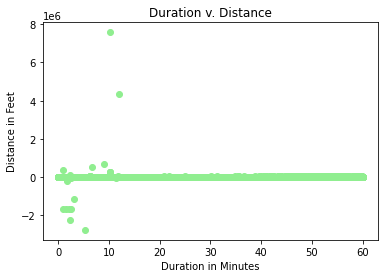

In [27]:
plt.scatter('duration_min', 'tripDistance', data = may_adj, color = 'lightgreen')
plt.xlabel('Duration in Minutes')
plt.ylabel('Distance in Feet')
plt.title('Duration v. Distance')
plt.show()

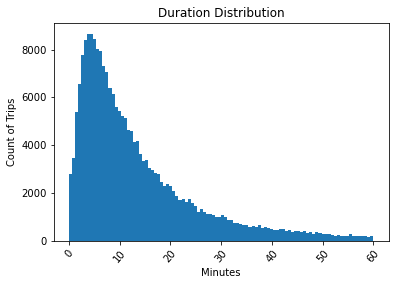

In [26]:
plt.hist(may_adj.duration_min, bins = 100)
plt.xticks(rotation=50)
plt.title('Duration Distribution')
plt.xlabel('Minutes')
plt.ylabel('Count of Trips')
plt.show()